In [3]:
import os
import cx_Oracle
from config import *
import queries as q
import math as m
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# query 
# -------------------------------------------------------------

con_str = db_username+"/"+db_password+"@"+db_ip+db_serv
#print con_str
con = cx_Oracle.connect(con_str)

cur = con.cursor()

q1 = q.q1
cur.execute(q1)
rws = cur.fetchall()

df = pd.DataFrame(rws)

cur.close()

#print df

df.to_csv('\\\\10.190.9.107\R$\\data_science\project\data\contact_spl_data.csv')

In [4]:
ct_sp = pd.read_csv('\\\\10.190.9.107\R$\\data_science\project\data\contact_spl_data.csv', index_col = 0)

In [ ]:

hr_trend = ct_sp['start_year'].value_counts().sort_index()

f, axs = plt.subplots(1 , figsize = (8,7))

axs.plot(hr_trend.index, hr_trend.values)

axs.set_xticklabels(hr_trend.index, rotation = 45)
axs.set_xlabel('Year')
axs.set_ylabel('Contacts Recruited')
s, sp = axs.get_ylim()
axs.set_yticks(np.arange(s,sp, 40000))
axs.grid(False)

for spine in axs.spines.values():
    spine.set_edgecolor('black')
f.suptitle('Contact Recruitment', fontsize = 15)

f.savefig('\\\\10.190.9.107\R$\\data_science\project\data\contact_rec_trend_year_wise.jpg', bbox_inches='tight')
#f.tight_layout()

In [ ]:
top = ['Construction & Property','Banking','Education','Finance Technology','Engineering','Financial Markets'\
 ,'Financial Services','Healthcare','Human Resources','Information Technology','Insurance','Legal','Marketing'\
 ,'Non Qualified Finance','Office Support','Procurement and Supply Chain','Qualified/Senior Finance','Retail','Social Care'\
 ,'Talent Solutions']

ct_sub = ct_pv.loc[top]
ct_sub = ct_sub.ix[:,2:-1]

In [ ]:
hc = ct_sub['contact_id'].loc['Healthcare']

f, axs = plt.subplots(1,1 , figsize = (8,7))

axs.plot(hc.index, hc.values)

axs.set_xticklabels(hc.index, rotation = 0)
axs.set_xlabel('Year', fontsize = 15)
axs.set_ylabel('Total Contacts Recruited', fontsize = 15)
axs.grid(False)
axs.set_axis_bgcolor('white')

plt.setp(axs.spines.values(), color='black')
[i.set_linewidth(1.7) for i in axs.spines.itervalues()]

f.suptitle('Contact Recruitment', fontsize = 15)
#f.tight_layout()
f.savefig('\\\\10.190.9.107\R$\\data_science\project\data\contact_rec_trend_healthcare_spl.jpg', bbox_inches='tight')

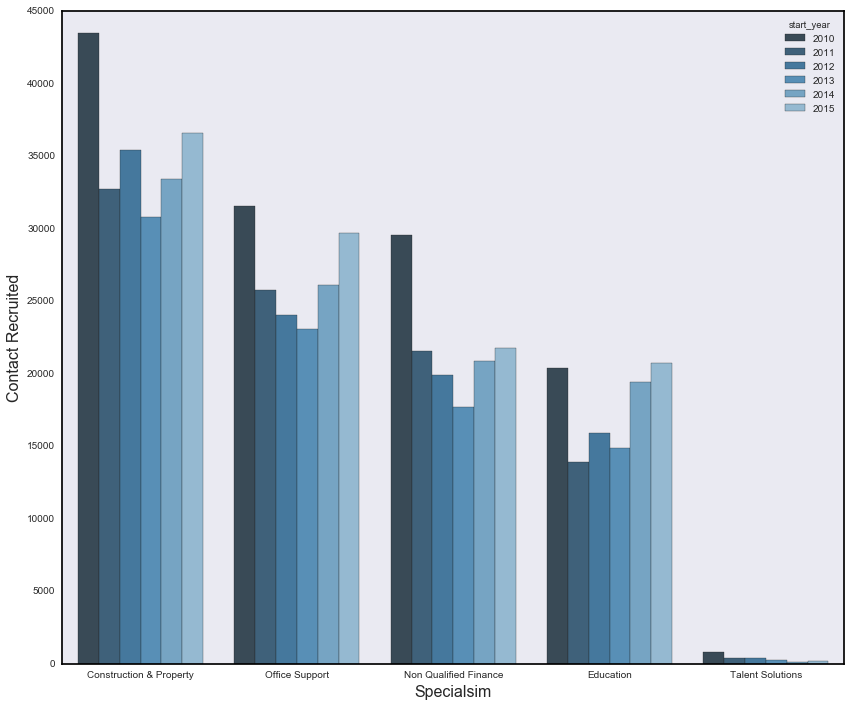

In [7]:
top_fv= ['Construction & Property','Education','Office Support','Talent Solutions','Non Qualified Finance']
top_fv_sub = ct_sub['contact_id'].loc[top_fv]

top_fv_sub.reset_index(inplace=True)
cols = top_fv_sub.columns[1:].tolist()

dt=pd.melt(top_fv_sub, id_vars=['specialism'], value_vars=cols)

# -----------------------------------------------------------------------------------------------------------------

f, axs = plt.subplots(1,1 , figsize = (12,10))
sns.set(style="whitegrid",color_codes=True)
sns.barplot(x='specialism', y= 'value', hue= 'start_year', data=dt, ax = axs, order = ['Construction & Property'\
 ,'Office Support','Non Qualified Finance','Education','Talent Solutions'], palette = "Blues_d")

axs.set_xlabel('Specialsim',fontsize= 16)
axs.set_ylabel('Contact Recruited',fontsize= 16)
axs.grid(False)

plt.setp(axs.spines.values(), color='black')
[i.set_linewidth(1.7) for i in axs.spines.itervalues()]

f.tight_layout()

f.savefig('\\\\10.190.9.107\R$\\data_science\project\data\graphs\contact_rec_trend_specialism_wise.jpg', bbox_inches='tight')

In [ ]:
#ct_jobs = pd.read_csv('\\\\10.190.9.107\R$\\data_science\project\data\uk_job_creation_data.csv', index_col = 0)

#ct_jobs.columns = ['contact_id','job_id','job_title','created_date','total_jobs','specialism','job_type','org_id','location']



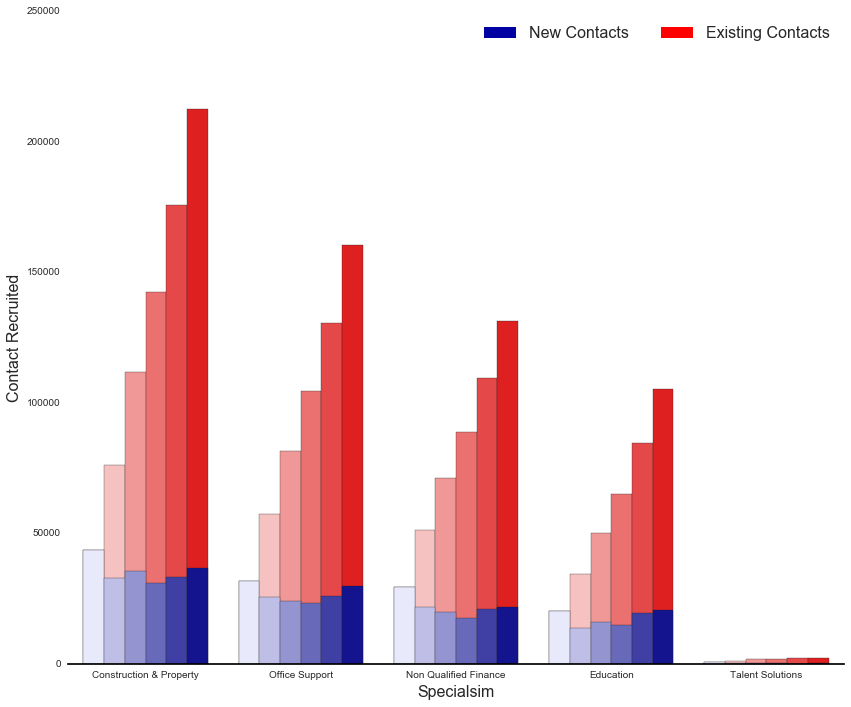

In [33]:
dt.rename(columns = {'value':'new'}, inplace = True)
dt.sort_values(by = ['specialism','start_year'], inplace = True)
dt['existing'] = dt.groupby(['specialism'])['new'].cumsum()
dt['existing'] = abs(dt['new'] - dt['existing'])
dt['total'] = dt['new']+ dt['existing']

# -----------------------------------------------------------------------------

f, axs = plt.subplots(1,1 , figsize = (12,10))
sns.set(style="whitegrid",color_codes=True)

sns.barplot(x='specialism', y= 'total', hue= 'start_year', data=dt, ax = axs, order = ['Construction & Property'\
 ,'Office Support','Non Qualified Finance','Education','Talent Solutions'],  color = "red")


bottom_plot = sns.barplot(x='specialism', y= 'new', hue= 'start_year', data=dt, ax = axs, order = ['Construction & Property'\
 ,'Office Support','Non Qualified Finance','Education','Talent Solutions'],  color = "#0000A3")


topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['New Contacts', 'Existing Contacts'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)

sns.despine(left=True)

axs.set_xlabel('Specialsim',fontsize= 16)
axs.set_ylabel('Contacts Recruited',fontsize= 16)
axs.grid(False)

plt.setp(axs.spines.values(), color='black')
[i.set_linewidth(1.7) for i in axs.spines.itervalues()]

f.tight_layout()

#f.savefig('\\\\10.190.9.107\R$\\data_science\project\data\graphs\contact_rec_trend_specialism_wise.jpg', bbox_inches='tight')



In [26]:
dt

,specialism,start_year,new,existing,total
0,Construction & Property,2010,43542.0,0.0,43542.0
5,Construction & Property,2011,32772.0,43542.0,76314.0
10,Construction & Property,2012,35437.0,76314.0,111751.0
15,Construction & Property,2013,30789.0,111751.0,142540.0
20,Construction & Property,2014,33428.0,142540.0,175968.0
25,Construction & Property,2015,36640.0,175968.0,212608.0
1,Education,2010,20406.0,0.0,20406.0
6,Education,2011,13902.0,20406.0,34308.0
11,Education,2012,15915.0,34308.0,50223.0
16,Education,2013,14879.0,50223.0,65102.0
